In [50]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

In [51]:
# Combine the data into a single dataset
combine = pd.merge(city, ride, on="city")

# Display the data table for preview
combine.sort_values(by="city", ascending=True).head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

In [52]:
urban = combine.loc[combine["type"] == "Urban"]
suburban = combine.loc[combine["type"] == "Suburban"]
rural = combine.loc[combine["type"] == "Rural"]

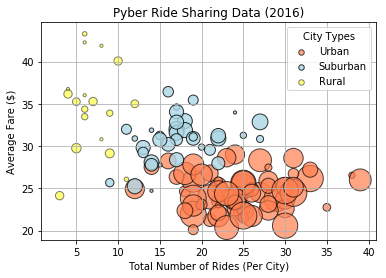

In [53]:
# Obtain the x and y coordinates for each of the three city types
urban_2 = urban.groupby(["city"]).count()
urban_3 = urban.groupby(["city"]).mean()
urban_data = pd.merge(urban_2, urban_3, on="city", how="outer")

surban_2 = suburban.groupby(["city"]).count()
surban_3 = suburban.groupby(["city"]).mean()
suburban_data = pd.merge(surban_2, surban_3, on="city", how="outer")

rural_2 = rural.groupby(["city"]).count()
rural_3 = rural.groupby(["city"]).mean()
rural_data = pd.merge(rural_2, rural_3, on="city", how="outer")

# Build the scatter plots for each city types
urban_data = urban_data.plot(kind="scatter", x="type", y="fare_y", color="coral", s=urban_data["driver_count_y"]*10, label="Urban", edgecolor="black", alpha=0.7)
suburban_data.plot(kind="scatter", x="type", y="fare_y", color="lightblue", s=suburban_data["driver_count_y"]*10, ax=urban_data, label="Suburban", edgecolor="black", alpha=0.8)
rural_data.plot(kind="scatter", x="type", y="fare_y", color="yellow", s=rural_data["driver_count_y"]*10, ax=urban_data, label="Rural", edgecolor="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
# Incorporate a text label regarding circle size
lgnd = plt.legend(title="City Types", numpoints=1, loc='best', ncol=1, markerscale=0.5, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

In [54]:
# Save Figure
plt.savefig("Images/ride_share.png", bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

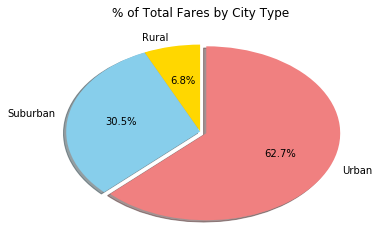

<Figure size 432x288 with 0 Axes>

In [55]:
# Calculate Type Percents
data = combine.groupby(["type", "city"]).sum()
total_fare = data["fare"].sum()

urban_fare = urban["fare"].sum()
suburban_fare = suburban["fare"].sum()
rural_fare = rural["fare"].sum()

# Build Pie Chart
fare_types =["Rural", "Suburban", "Urban"]
fares = [rural_fare, suburban_fare, urban_fare]
explode = (0, 0 , 0.05)
colors = ["gold", "skyblue", "lightcoral"]

# Show pie chart
plt.pie(fares, explode=explode, labels=fare_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig("Images/fare_percentage.png")

## Total Rides by City Type

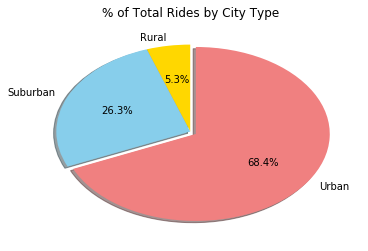

<Figure size 432x288 with 0 Axes>

In [56]:
# Calculate Ride Percents
urban_rides = urban["driver_count"].count()
suburban_rides = suburban["driver_count"].count()
rural_rides = rural["driver_count"].count() 

# Build Pie Chart
ride_types =["Rural", "Suburban", "Urban"]
rides = [rural_rides, suburban_rides, urban_rides]
explode = (0, 0 , 0.05)
colors = ["gold", "skyblue", "lightcoral"]

# Show pie chart
plt.pie(rides, explode=explode, labels=ride_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("Images/ride_percentage.png")


## Total Drivers by City Type

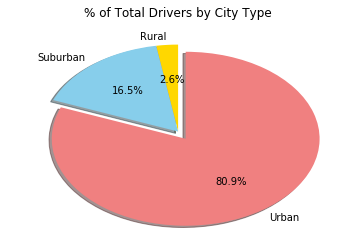

<Figure size 432x288 with 0 Axes>

In [57]:
# Calculate Driver Percents
urban_mean = urban.groupby(["city"]).mean()
suburban_mean = suburban.groupby("city").mean()
rural_mean = rural.groupby("city").mean()

urban_count = urban_mean["driver_count"].sum()
suburban_count = suburban_mean["driver_count"].sum()
rural_count = rural_mean["driver_count"].sum() 

# Build Pie Chart
count_types =["Rural", "Suburban", "Urban"]
counts = [rural_count, suburban_count, urban_count]
explode = (0, 0 , 0.1)
colors = ["gold", "skyblue", "lightcoral"]

# Show pie chart
plt.pie(counts, explode=explode, labels=ride_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure
plt.savefig("Images/drivers_percentage.png")